In [38]:
from torchvision.ops import box_iou
import os
import pandas as pd
import json
import torch
import seaborn as sns

In [39]:
BASE_DIR = "/mnt/Enterprise/safal/AI_assisted_microscopy_system/"
sample_types = [
    "smartphone_sample",
    "smartphone_reference",
    "brightfield_sample",
    "brightfield_reference",
]
model_type = "yolov8"
sample_type="brightfield_sample"

In [40]:
gt_annotations_file = os.path.join(
    BASE_DIR,
    "cysts_dataset_all",
    sample_type,
    "fold_5",
    f"{sample_type}_coco_annos_val.json",
)
pred_annotations_file = os.path.join(
    BASE_DIR,
    "outputs",
    sample_type,
    model_type,
    "fold_5",
    "mmdetection_cysts",
    f"yolov8_{sample_type}_fold_5",
    "predictions.json"
)


In [41]:
gt_annos = json.load(open(gt_annotations_file))

In [42]:
pred_annos_df = pd.read_json(pred_annotations_file)

In [43]:
# change bbox format to x1, y1, x2, y2
pred_annos_df["bbox"] = pred_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)

In [44]:
# change gt_annos id value to image names
for i in range(len(gt_annos["images"])):
    gt_annos["images"][i]["image_id"] = gt_annos["images"][i]["file_name"].rsplit("/")[-1].split(".")[0]


In [45]:
images_df = pd.DataFrame(gt_annos["images"])
gt_annos_df = pd.DataFrame(gt_annos["annotations"])

In [46]:
images_df

,id,file_name,height,width,image_id
0,1,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0001
1,4,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0004
2,13,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0013
3,14,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0014
4,20,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0020
...,...,...,...,...,...
196,1040,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0983
197,1044,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0987
198,1046,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0989
199,1056,/mnt/Enterprise/safal/AI_assisted_microscopy_s...,480,640,BS0999


In [47]:
gt_annos_df["bbox"] = gt_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)


In [48]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,1,2,0,"[268.0, 432.0, 278.0, 442.0]",[],0,100.000000
1,1,3,0,"[518.0, 361.0, 530.0, 371.0]",[],0,120.000000
2,4,5,1,"[529.2140833378212, 297.5634355704484, 562.785...",[],0,835.036536
3,4,6,1,"[466.9134134481312, 374.45361413506225, 487.08...",[],0,586.893520
4,13,30,1,"[361.11871973472756, 168.8558744429978, 398.88...",[],0,917.186553
...,...,...,...,...,...,...,...
216,963,1012,1,"[241.91607846833455, 219.5085686776027, 266.08...",[],0,748.788962
217,1014,1061,0,"[319.0, 303.0, 331.0, 317.0]",[],0,168.000000
218,1016,1063,0,"[383.0, 165.0, 401.0, 183.0]",[],0,324.000000
219,1046,1080,0,"[498.0, 332.0, 512.0, 346.0]",[],0,196.000000


In [49]:
# replace image_id of gt_annos_df with image_id of images_df
gt_annos_df["image_id"] = gt_annos_df["image_id"].apply(
    lambda x: images_df[images_df["id"] == x]["image_id"].values[0]
)


In [50]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,BS0001,2,0,"[268.0, 432.0, 278.0, 442.0]",[],0,100.000000
1,BS0001,3,0,"[518.0, 361.0, 530.0, 371.0]",[],0,120.000000
2,BS0004,5,1,"[529.2140833378212, 297.5634355704484, 562.785...",[],0,835.036536
3,BS0004,6,1,"[466.9134134481312, 374.45361413506225, 487.08...",[],0,586.893520
4,BS0013,30,1,"[361.11871973472756, 168.8558744429978, 398.88...",[],0,917.186553
...,...,...,...,...,...,...,...
216,BS0906,1012,1,"[241.91607846833455, 219.5085686776027, 266.08...",[],0,748.788962
217,BS0957,1061,0,"[319.0, 303.0, 331.0, 317.0]",[],0,168.000000
218,BS0959,1063,0,"[383.0, 165.0, 401.0, 183.0]",[],0,324.000000
219,BS0989,1080,0,"[498.0, 332.0, 512.0, 346.0]",[],0,196.000000


In [51]:
pred_annos_df

,image_id,category_id,bbox,score
0,BS0001,0,"[518.5, 357.75, 530.5, 369.75]",0.42822
1,BS0001,0,"[267.75, 430.25, 278.75, 441.75]",0.21667
2,BS0001,0,"[518.0, 357.5, 528.0, 367.5]",0.07288
3,BS0001,0,"[535.5, 349.0, 546.5, 358.5]",0.00800
4,BS0001,0,"[517.0, 357.5, 531.0, 372.5]",0.00661
...,...,...,...,...
1976,BS0313,0,"[116.125, 353.0, 126.375, 364.0]",0.00220
1977,BS0313,0,"[320.5, 117.25, 331.0, 127.25]",0.00121
1978,BS0313,0,"[117.125, 354.5, 125.875, 362.5]",0.00110
1979,BS1003,0,"[284.5, 285.0, 299.5, 302.0]",0.57861


In [52]:
categories = sorted(gt_annos_df.category_id.unique())

    # dataframe to store the precision, recall and f1 score for each class
metrics_df = pd.DataFrame(
    columns=["category", "precision", "recall", "f1_score", "TP", "FP"]
)

In [53]:
precisions = dict(
    (category, []) for category in categories
)
recalls = dict((category, []) for category in categories)


In [54]:
precisions

{0: [], 1: []}

In [55]:
# for category in categories:
category = 1
# get the ground truth annotations for the current class
gt_annos_df_class = gt_annos_df[
    gt_annos_df.category_id == category
]
# get the predicted annotations for the current class
pred_annos_df_class = pred_annos_df[
    pred_annos_df.category_id == category
]

# sort the predicted annotations by score
pred_annos_df_class = pred_annos_df_class.sort_values(
    by="score", ascending=False
)

# filter predictions with score > 0.001
# pred_annos_df_class = pred_annos_df_class[
#     pred_annos_df_class.score > 0.3
# ]

true_positives_class = 0
false_positives_class = 0

# get image ids for the current class from both ground truth and predicted annotations
image_ids = pred_annos_df_class["image_id"].unique()
images_len = len(image_ids)


In [56]:
pred_annos_df_class

,image_id,category_id,bbox,score
1963,BS0378,1,"[134.875, 103.5, 180.375, 130.0]",0.85010
350,BS0574,1,"[374.5, 125.25, 399.5, 165.25]",0.83447
344,BS0573,1,"[108.875, 209.25, 131.625, 245.75]",0.83105
1927,BS0337,1,"[403.75, 329.5, 425.75, 364.5]",0.82324
1934,BS0339,1,"[404.0, 329.0, 426.5, 364.0]",0.81982
...,...,...,...,...
47,BS0663,1,"[551.0, 232.25, 563.0, 244.25]",0.00105
1317,BS0014,1,"[138.375, 120.375, 147.625, 129.875]",0.00105
1202,BS0214,1,"[61.0, 54.562, 82.5, 68.687]",0.00104
860,BS0491,1,"[217.625, 182.25, 231.375, 196.25]",0.00103


In [57]:
set(pred_annos_df_class["image_id"].unique()).intersection(set(gt_annos_df_class["image_id"].unique()))

{'BS0004',
 'BS0013',
 'BS0020',
 'BS0040',
 'BS0047',
 'BS0052',
 'BS0058',
 'BS0187',
 'BS0189',
 'BS0191',
 'BS0205',
 'BS0214',
 'BS0216',
 'BS0217',
 'BS0288',
 'BS0295',
 'BS0308',
 'BS0330',
 'BS0337',
 'BS0339',
 'BS0343',
 'BS0366',
 'BS0372',
 'BS0378',
 'BS0379',
 'BS0385',
 'BS0387',
 'BS0389',
 'BS0392',
 'BS0397',
 'BS0471',
 'BS0475',
 'BS0476',
 'BS0553',
 'BS0555',
 'BS0560',
 'BS0561',
 'BS0562',
 'BS0563',
 'BS0564',
 'BS0565',
 'BS0566',
 'BS0573',
 'BS0574',
 'BS0592',
 'BS0766',
 'BS0804',
 'BS0805',
 'BS0906'}

In [58]:
image_ids

array(['BS0378', 'BS0574', 'BS0573', 'BS0337', 'BS0339', 'BS0805',
       'BS0189', 'BS0564', 'BS0013', 'BS0592', 'BS0563', 'BS0187',
       'BS0804', 'BS0475', 'BS0047', 'BS0385', 'BS0397', 'BS0471',
       'BS0561', 'BS0295', 'BS0217', 'BS0565', 'BS0795', 'BS0020',
       'BS0214', 'BS0379', 'BS0387', 'BS0366', 'BS0372', 'BS0308',
       'BS0288', 'BS0040', 'BS0562', 'BS0906', 'BS0058', 'BS0766',
       'BS0555', 'BS0004', 'BS0330', 'BS0052', 'BS0476', 'BS0034',
       'BS0205', 'BS0343', 'BS0191', 'BS0987', 'BS0216', 'BS0768',
       'BS0389', 'BS0566', 'BS0504', 'BS0560', 'BS0391', 'BS0392',
       'BS0959', 'BS0553', 'BS0999', 'BS0964', 'BS0821', 'BS0315',
       'BS0035', 'BS0969', 'BS0779', 'BS0955', 'BS0406', 'BS0726',
       'BS0510', 'BS0902', 'BS0313', 'BS0818', 'BS1003', 'BS0949',
       'BS0474', 'BS0646', 'BS0130', 'BS0427', 'BS0654', 'BS0683',
       'BS0206', 'BS0600', 'BS0161', 'BS0413', 'BS0733', 'BS0489',
       'BS0170', 'BS0121', 'BS0159', 'BS0840', 'BS0418', 'BS03

In [82]:

# for image in image_ids:
image = "BS0013"
# get the ground truth annotations for the current image
gt_annos_df_image = gt_annos_df_class[
    gt_annos_df_class.image_id == image
]
# get the predicted annotations for the current image
pred_annos_df_image = pred_annos_df_class[
    pred_annos_df_class.image_id == image
]

# get the ground truth bounding boxes
gt_bboxes = list(gt_annos_df_image.bbox.values)
gt_bboxes = torch.tensor(gt_bboxes)

# get the predicted bounding boxes
pred_bboxes = list(pred_annos_df_image.bbox.values)
pred_bboxes = torch.tensor(pred_bboxes)


In [60]:

# if len(gt_bboxes) == 0:
#     false_positives_class += len(pred_bboxes)
#     precisions[category].append(
#         true_positives_class / (true_positives_class + false_positives_class)
#     )
#     recalls[category].append(
#         true_positives_class / gt_annos_df_class.shape[0]
#     )
#     continue


In [83]:
gt_bboxes

tensor([[361.1187, 168.8559, 398.8813, 193.1441],
        [259.8486,  24.6146, 280.1514,  57.3854],
        [180.7861, 288.7351, 203.2139, 327.2649]])

In [84]:
pred_bboxes

tensor([[181.0000, 289.5000, 204.5000, 325.5000],
        [260.2500,  24.4380, 280.7500,  57.6880],
        [361.2500, 169.5000, 400.2500, 193.0000],
        [367.2500, 160.8750, 389.2500, 199.3750],
        [539.0000, 345.2500, 559.0000, 356.7500]])

In [85]:

# get the intersection over union for each predicted bounding box
ious = box_iou(pred_bboxes, gt_bboxes)


In [86]:
ious

tensor([[0.0000, 0.0000, 0.8784],
        [0.0000, 0.9387, 0.0000],
        [0.9315, 0.0000, 0.0000],
        [0.4345, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])

In [87]:

# get the maximum iou for each ground truth bounding box
max_ious, max_idxs = torch.max(ious, dim=1)


In [88]:
max_ious , max_idxs

(tensor([0.8784, 0.9387, 0.9315, 0.4345, 0.0000]), tensor([2, 1, 0, 0, 0]))

In [89]:
gt_matched = torch.zeros(gt_bboxes.shape[0])

In [90]:
gt_matched

tensor([0., 0., 0.])

In [91]:
for i, pred_bbox in enumerate(pred_bboxes):
    iou_pred, gt_idx = max_ious[i], max_idxs[i]
    if iou_pred > 0.5:
        if gt_matched[gt_idx] == 0:
            true_positives_class += 1
            gt_matched[gt_idx] = 1
        else:
            false_positives_class += 1
    else:
        false_positives_class += 1


In [93]:
true_positives_class

5

In [72]:

# get the indices of the predicted bounding boxes with iou > 0.5
tp_indices = torch.where(max_ious >= 0.5)[0]
# print(ious)

# get the indices of the predicted bounding boxes with iou < 0.5
fp_indices = torch.where(max_ious < 0.5)[0]


In [74]:
fp_indices

tensor([], dtype=torch.int64)

In [ ]:

# update the true positives and false positives
true_positives_class += len(tp_indices)
false_positives_class += len(fp_indices)
precisions[category].append(
    true_positives_class / (true_positives_class + false_positives_class)
)
recalls[category].append(
    true_positives_class / gt_annos_df_class.shape[0]
)

# calculate the precision and recall
precision = true_positives_class / (
true_positives_class + false_positives_class
)
recall = true_positives_class / gt_annos_df_class.shape[0]

category_name = gt_annos["categories"][category]["name"]
f1_score = 2 * (precision * recall) / (precision + recall)

category_metrics_df = pd.DataFrame(
{
    "category": category_name,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score,
    "TP": true_positives_class,
    "FP": false_positives_class,
},
index=[0],
)

# concatenate the metrics for the current class to the metrics dataframe
metrics_df = pd.concat([metrics_df, category_metrics_df], axis=0)


In [23]:
metrics_df

,category,precision,recall,f1_score,TP,FP
0,Crypto,0.221733,0.986928,0.362110,151,530
0,Giardia,0.275424,0.955882,0.427632,65,171


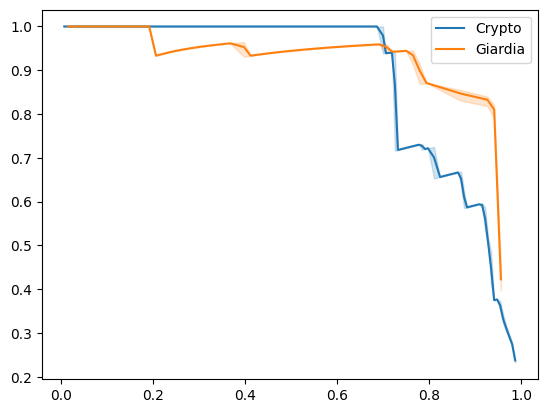

In [42]:
# plot the precision recall curve
for category in categories:
    sns.lineplot(
        x=recalls[category],
        y=precisions[category],
        label=gt_annos["categories"][category]["name"],
        
    )


